In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Separate the fraud and non-fraud cases
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Undersample non-fraud cases
non_fraud_sample = non_fraud.sample(n=len(fraud))

# Concatenate the undersampled non-fraud and fraud cases
balanced_df = pd.concat([non_fraud_sample, fraud])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Standardize the 'Amount' and 'Time' columns
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Define the features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29933
           1       0.77      0.61      0.68        67

    accuracy                           1.00     30000
   macro avg       0.89      0.81      0.84     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy: 0.9987333333333334


In [27]:
# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29933
           1       0.98      0.84      0.90        67

    accuracy                           1.00     30000
   macro avg       0.99      0.92      0.95     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy: 0.9996


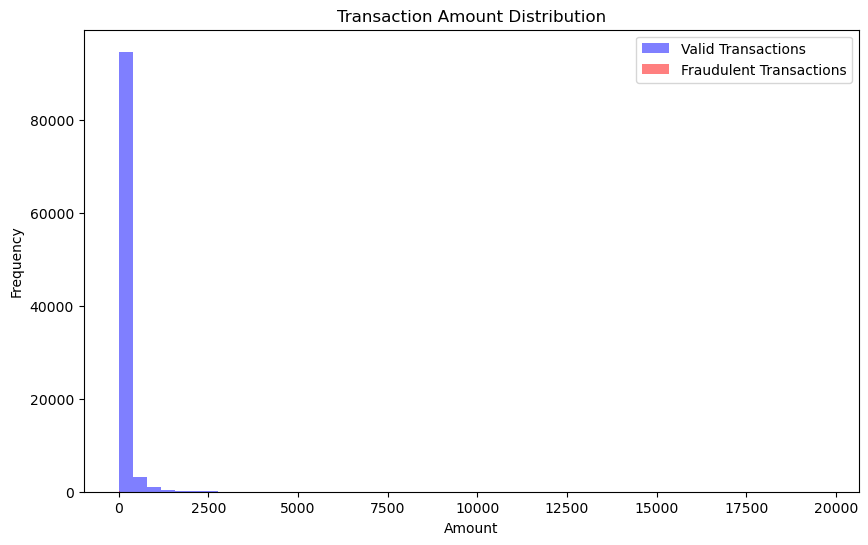

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Plotting the distribution of the 'Amount' for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Valid Transactions', color='blue')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraudulent Transactions', color='red')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

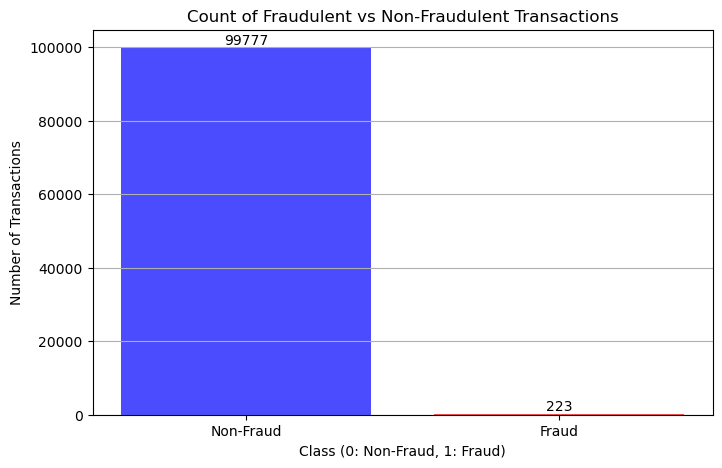

Fraud Cases: 223
Valid Transactions: 99777


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Count the number of fraud and non-fraud cases
class_counts = df['Class'].value_counts()
fraud_count = class_counts[1]
non_fraud_count = class_counts[0]

# Plotting the counts of fraud vs non-fraud cases
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'], alpha=0.7)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(class_counts.index, ['Non-Fraud', 'Fraud'])
plt.grid(axis='y')

# Display counts on the bar chart
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# Print counts
print(f'Fraud Cases: {fraud_count}')
print(f'Valid Transactions: {non_fraud_count}')